In [2]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('concrete_data.csv')

In [3]:
df.shape

(1030, 9)

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Data Description
1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength -- quantitative -- MPa -- Output Variable

Our data has 1030 rows with 8 independent features.

All features are numeric with no null values.

In [6]:
import seaborn as sns

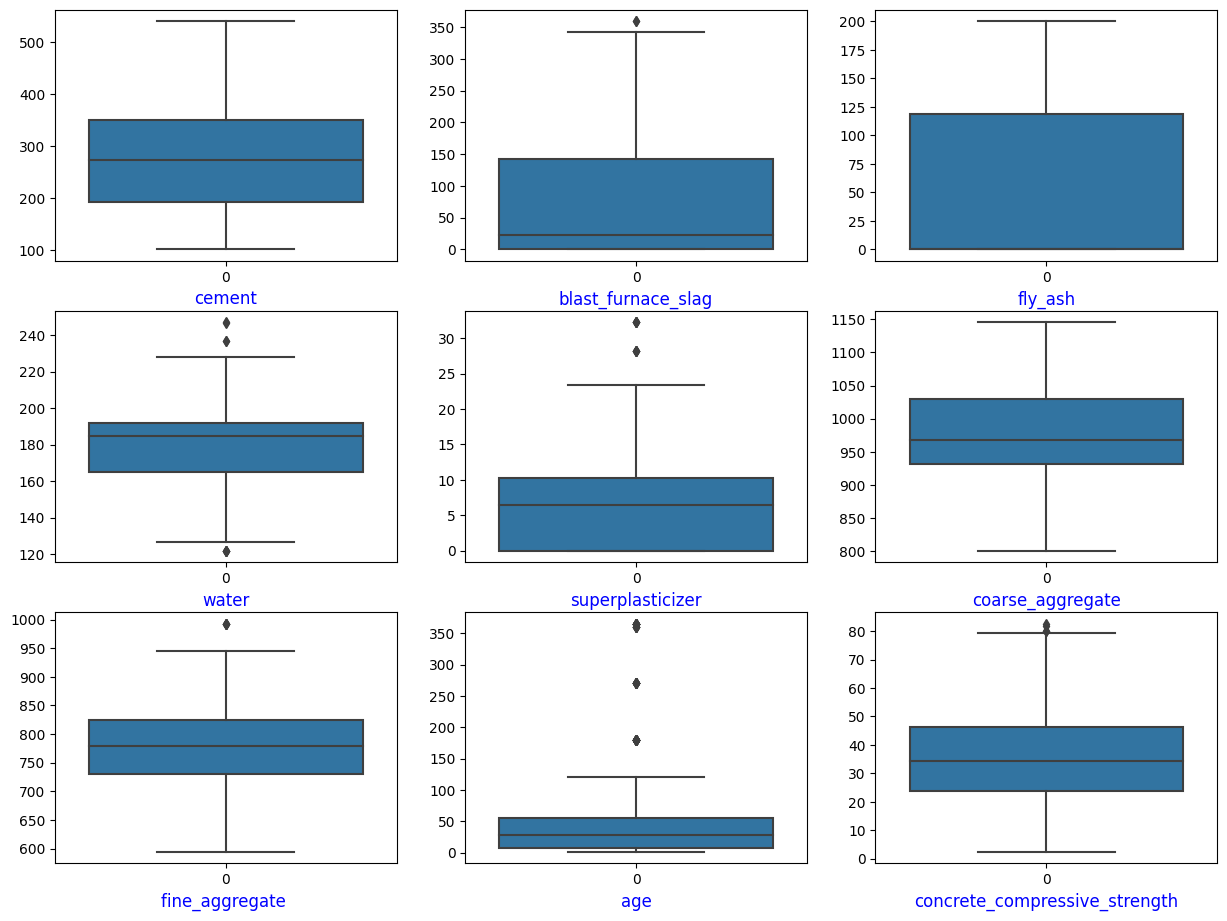

In [12]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for colm in df.columns:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(df[colm])
    plt.xlabel(colm,fontsize=12,color='blue')
    plotnumber+=1
plt.show()


We don't have significant numbers of outliers in our data. So we don't have to do outlier imputation.

In [14]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot: >

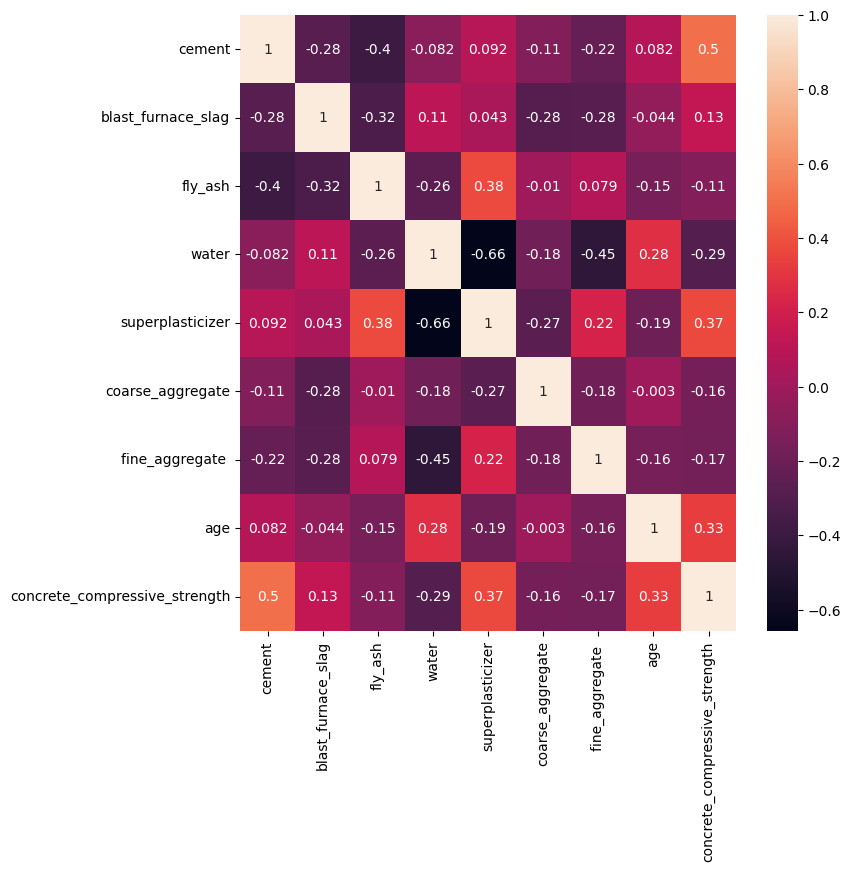

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

Water  (component 4) and Superplasticizer (component 5) are the most correlated features (negatively correlated) but not enough to remove any of these.

In [26]:
df.iloc[:,-1]

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [31]:
df.columns[:-1]

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

C:\Users\azu\AppData\Local\Temp\ipykernel_14180\1734086480.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[colm])
C:\Users\azu\AppData\Local\Temp\ipykernel_14180\1734086480.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[colm])
C:\Users\azu\AppData\Local\Temp\ipykernel_14180\173408

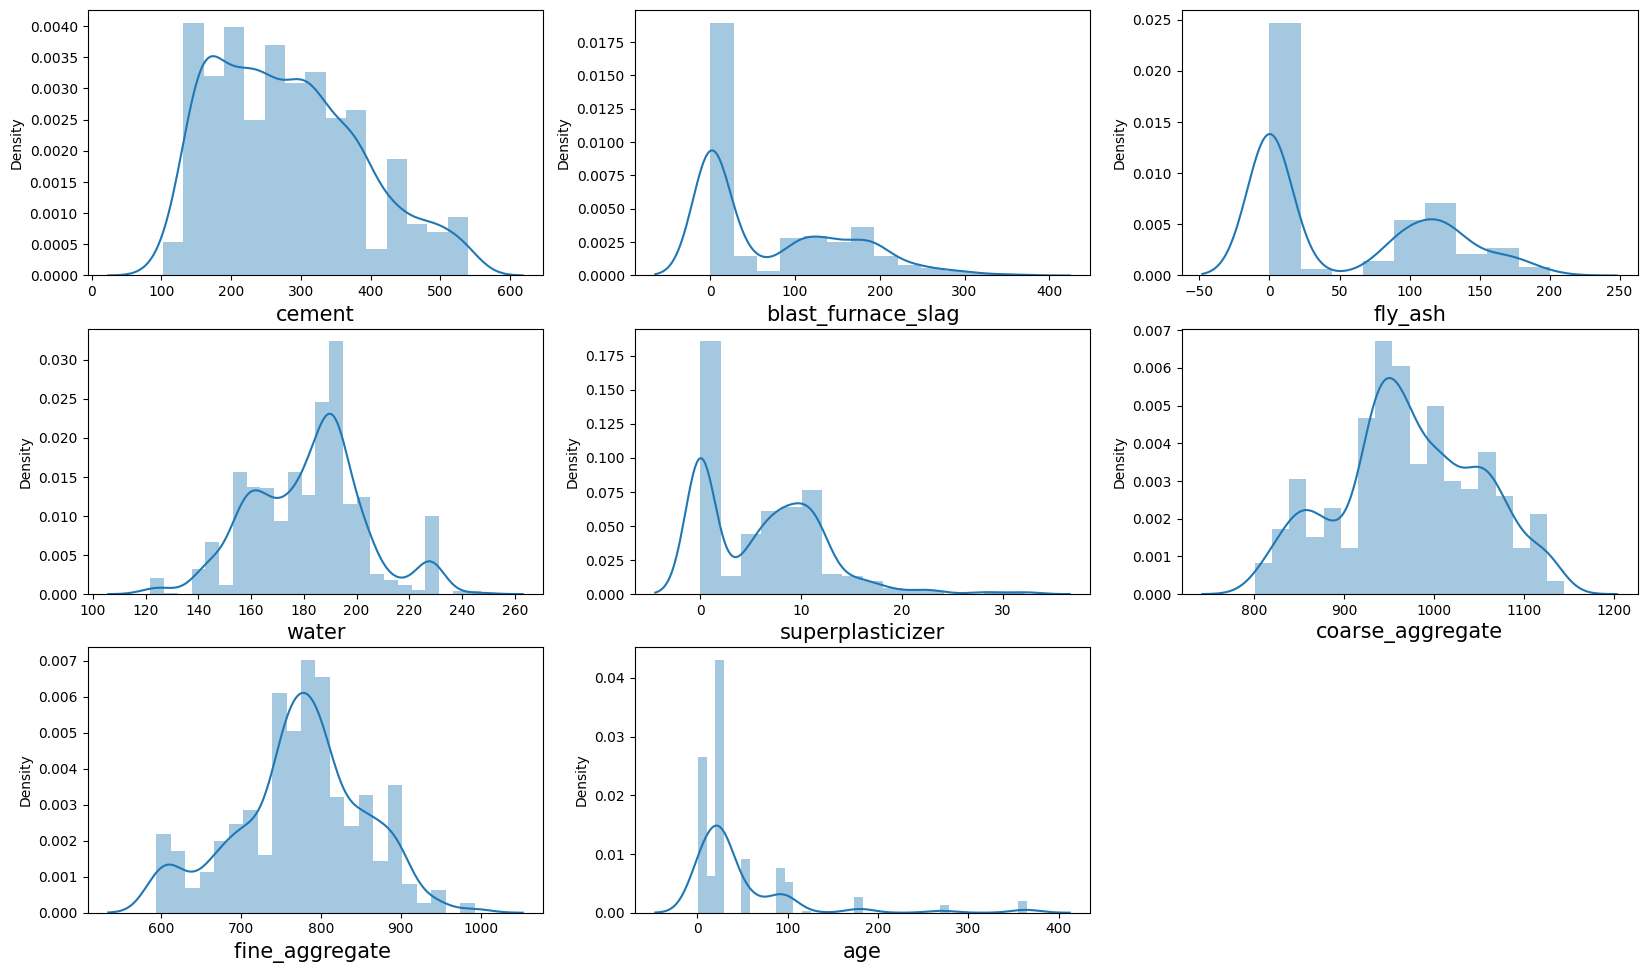

In [34]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1
for colm in df.columns[:-1]:
    plt.subplot(5,3,plotnumber)
    sns.distplot(df[colm])
    plt.xlabel(colm,fontsize=15)
    #plt.ylabel('concrete_compressive_strength',fontsize=15)
    #plt.title(f'{colm} vs concrete_compressive_strength',fontsize=20)
    plotnumber+=1
plt.show()

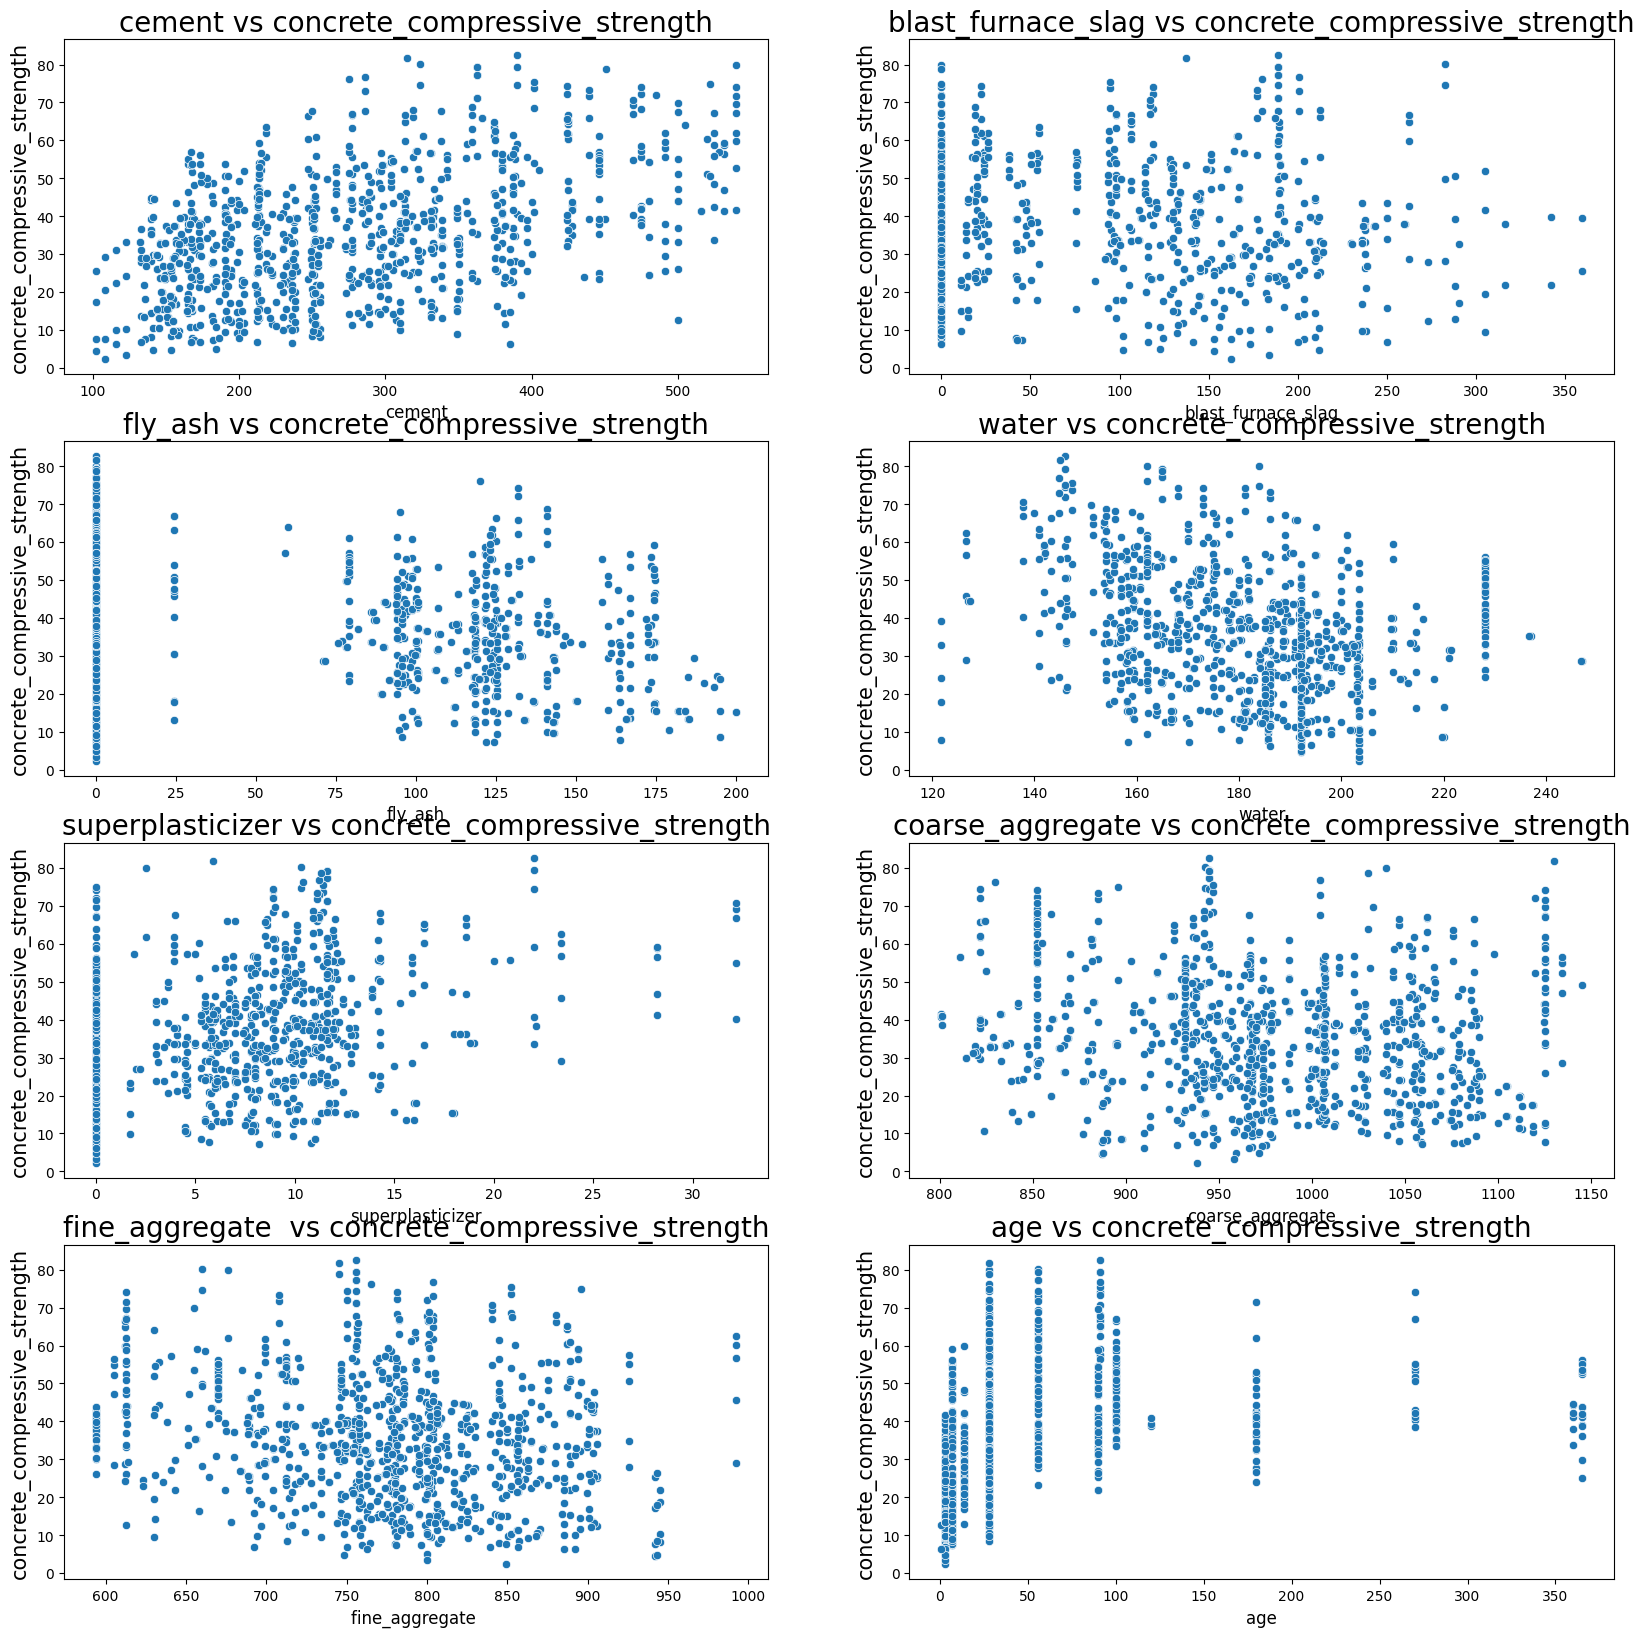

In [49]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1
for colm in df.columns[:-1]:
    plt.subplot(4,2,plotnumber)
    sns.scatterplot(data=df,x=colm,y=df.iloc[:,-1])
    plt.xlabel(colm,fontsize=12,color='black')
    plt.ylabel('concrete_compressive_strength',fontsize=15)
    plt.title(f'{colm} vs concrete_compressive_strength',fontsize=20)
    plotnumber+=1
plt.show()

In [42]:
df.iloc[:,-1]

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [53]:
# train test split
X = df.drop(['concrete_compressive_strength'],axis=1)
Y = df['concrete_compressive_strength']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state =10)

In [55]:
from sklearn.preprocessing import StandardScaler
standScale = StandardScaler()

In [56]:
x_train = pd.DataFrame(standScale.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
x_test = pd.DataFrame(standScale.transform(x_test),columns=x_test.columns,index=x_test.index)

In [7]:
df['concrete_compressive_strength'].dtype=='O'

False